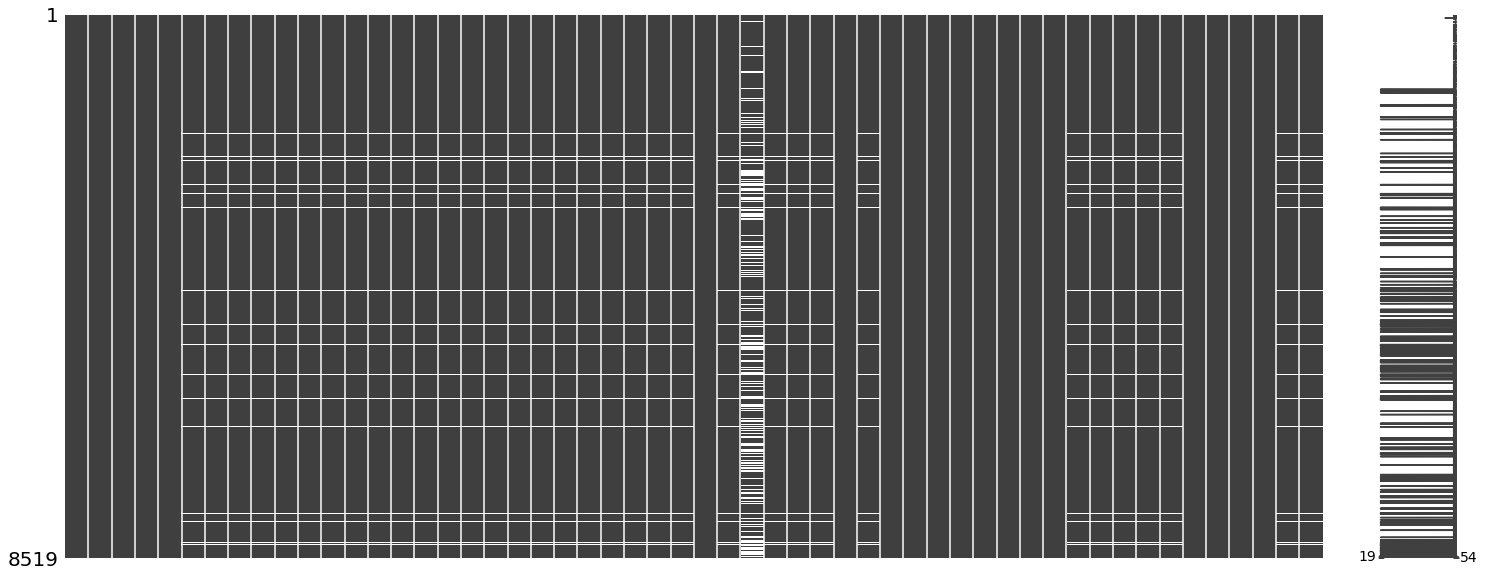

In [131]:
import pandas as pd
import numpy as np
import pickle 
from datetime import datetime,timedelta
import missingno as msno
import matplotlib.pyplot as plt
import joypy
import seaborn as sns

%matplotlib inline

with open('riaa_df.pkl', 'rb') as f:
        riaa_df = pickle.load(f)
with open('song_df_aggregate.pkl', 'rb') as f:
        song_df = pickle.load(f)
msno.matrix(song_df)

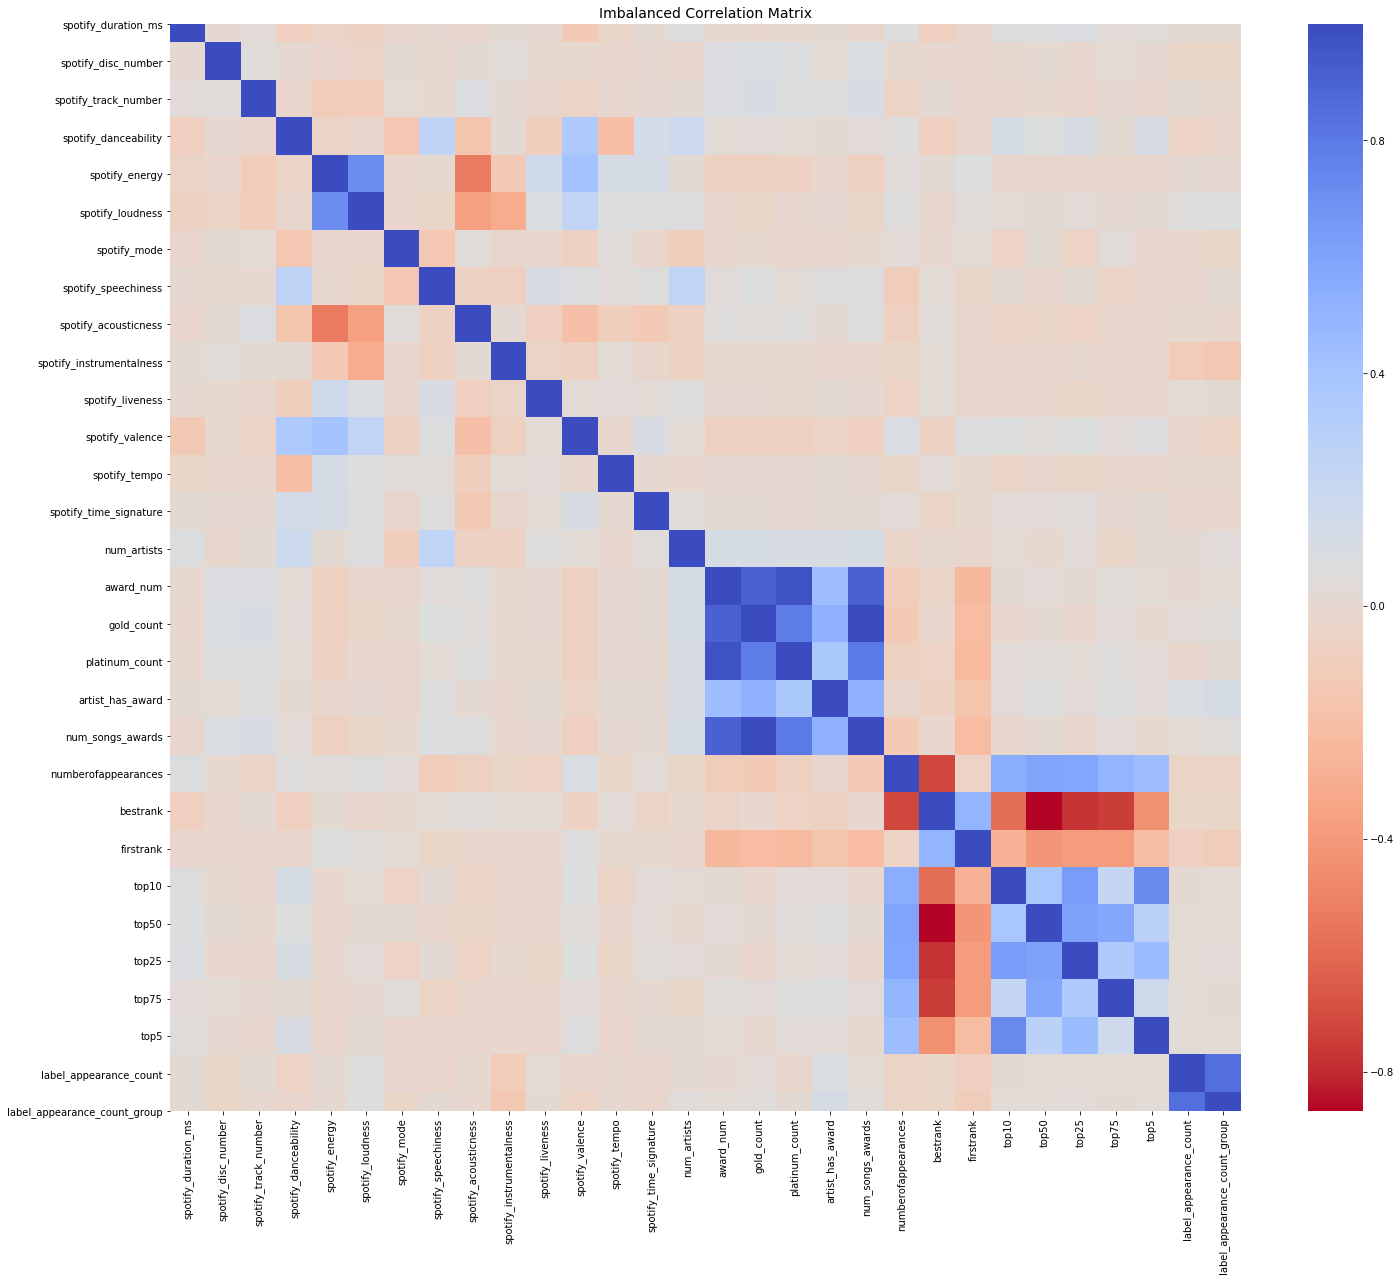

In [41]:
f,ax1 = plt.subplots(1, 1, figsize=(24,20))

# Entire DataFrame
corr = song_df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix", fontsize=14)
plt.show()

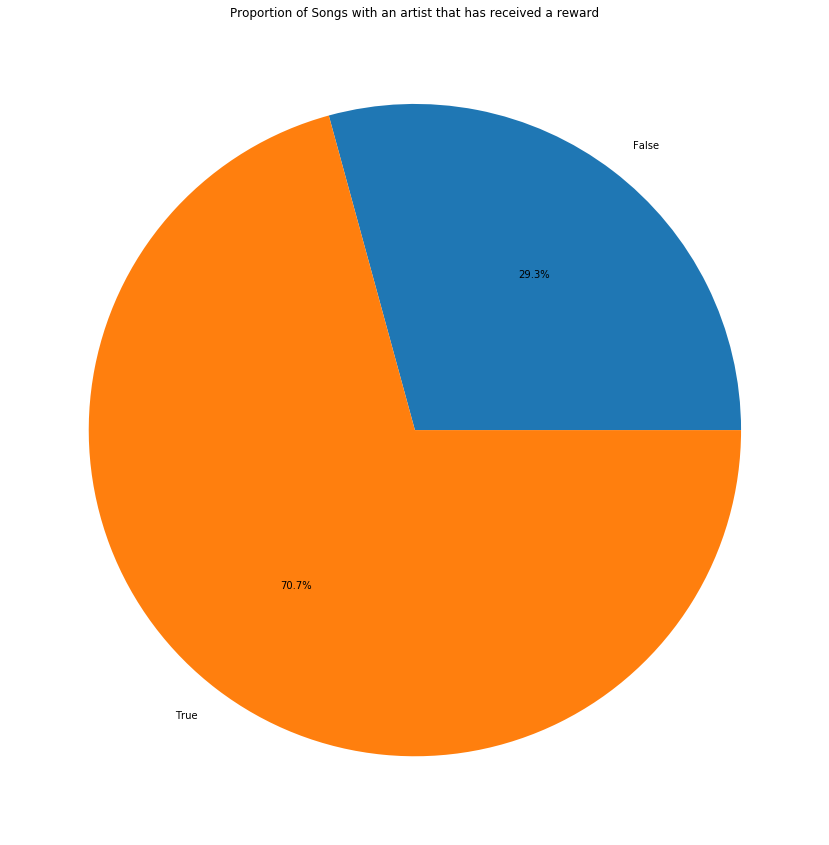

In [18]:
plt.figure(figsize=(15,15))
plt.pie(song_df.groupby("artist_has_award").count()["artist"],autopct ="%1.1f%%",labels=song_df.groupby("artist_has_award").count()["artist"].index)
plt.title("Proportion of Songs with an artist that has received an award")
plt.show()

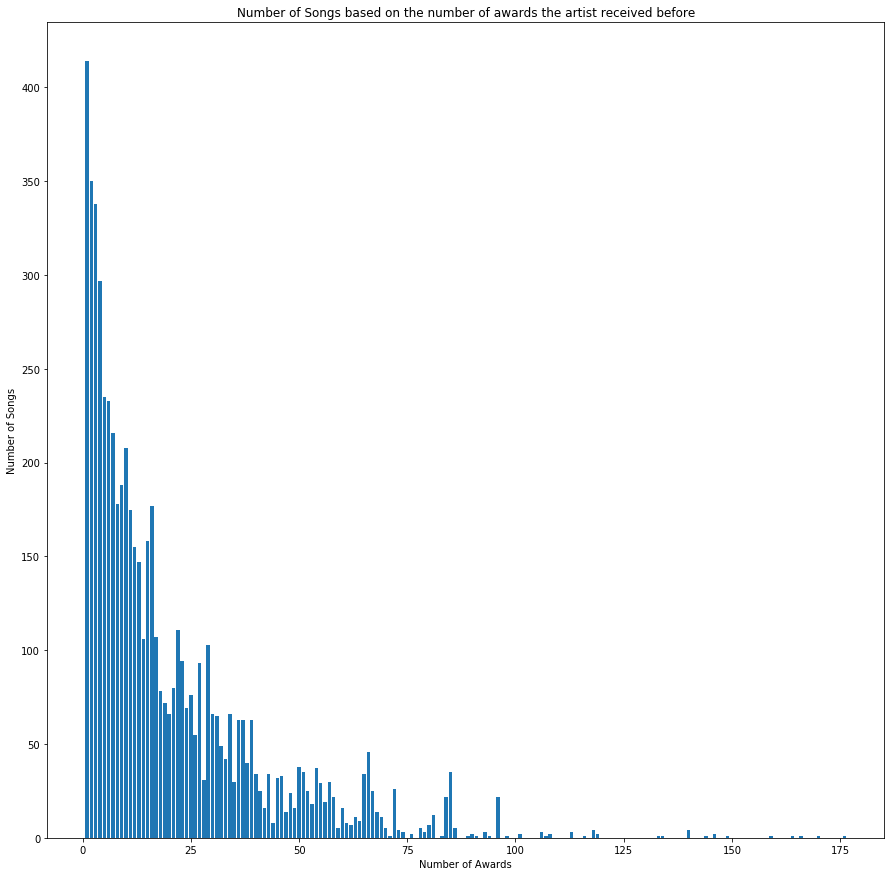

In [22]:
award_num = song_df[song_df["artist_has_award"] ==1].groupby("award_num").count()["artist"]
plt.figure(figsize=(15,15))
plt.bar(award_num.index,award_num)
plt.title("Number of Songs based on the number of awards the artist received before")
plt.ylabel("Number of Songs")
plt.xlabel("Number of Awards")
plt.show()

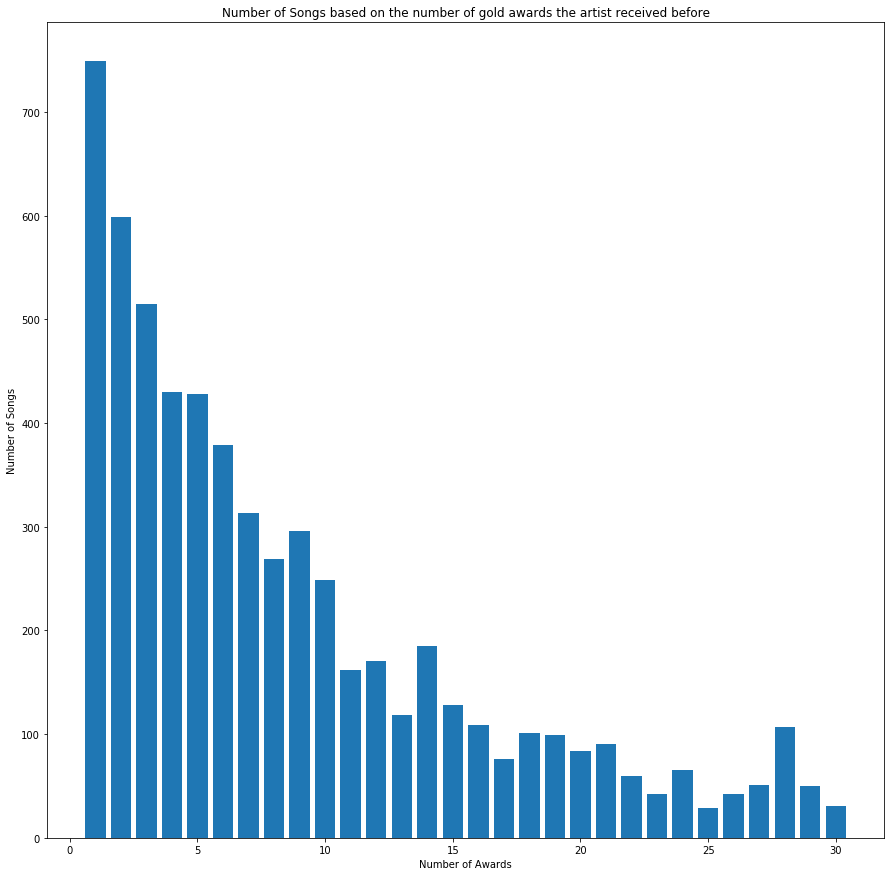

In [23]:
award_num = song_df[song_df["artist_has_award"] ==1].groupby("gold_count").count()["artist"]
plt.figure(figsize=(15,15))
plt.bar(award_num.index,award_num)
plt.title("Number of Songs based on the number of gold awards the artist received before")
plt.ylabel("Number of Songs")
plt.xlabel("Number of Awards")
plt.show()

In [ ]:
song_df["artist_has_award"] = song_df["award_num"] > 0
award_num = song_df[song_df["artist_has_award"] ==1].groupby("platinum_count").count()["artist"]
plt.figure(figsize=(15,15))
plt.bar(award_num.index,award_num)
plt.title("Number of Songs based on the number of platinum awards the artist received before")
plt.ylabel("Number of Songs")
plt.xlabel("Number of Awards")
plt.show()

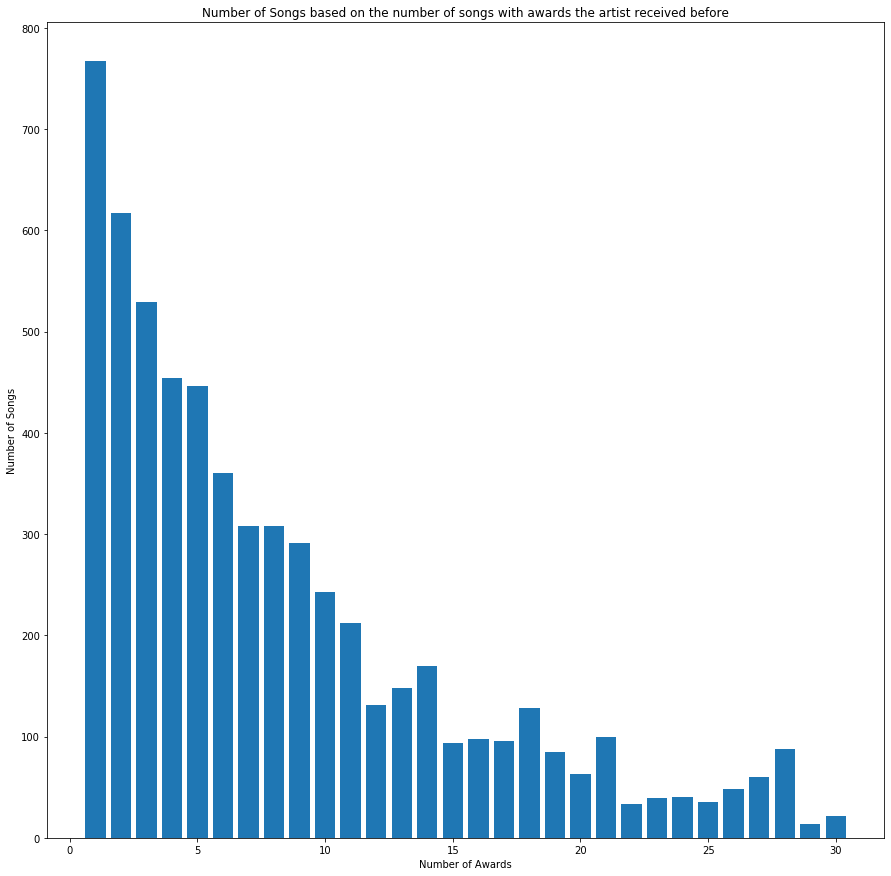

In [27]:
song_df["artist_has_award"] = song_df["award_num"] > 0
award_num = song_df[song_df["artist_has_award"] ==1].groupby("num_songs_awards").count()["artist"]
plt.figure(figsize=(15,15))
plt.bar(award_num.index,award_num)
plt.title("Number of Songs based on the number of songs with awards the artist received before")
plt.ylabel("Number of Songs")
plt.xlabel("Number of Awards")
plt.show()

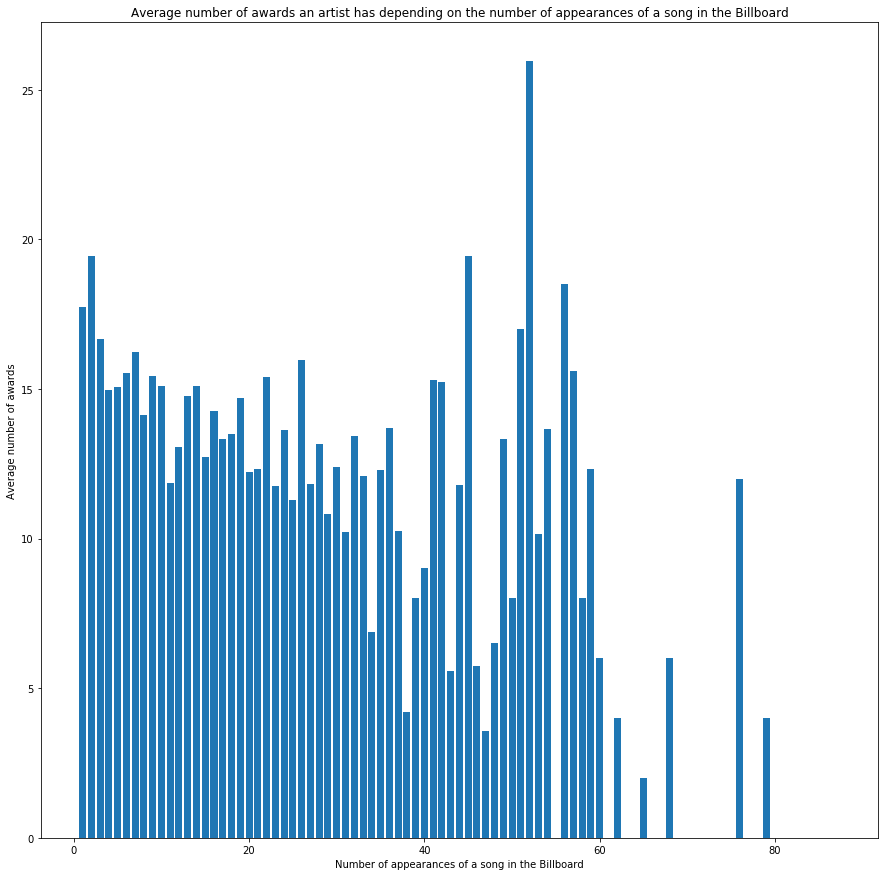

In [31]:
award_num = song_df.groupby("numberofappearances").mean()["award_num"]
plt.figure(figsize=(15,15))
plt.bar(award_num.index,award_num)
plt.title("Average number of awards an artist has depending on the number of appearances of a song in the Billboard")
plt.ylabel("Average number of awards")
plt.xlabel("Number of appearances of a song in the Billboard")
plt.show()

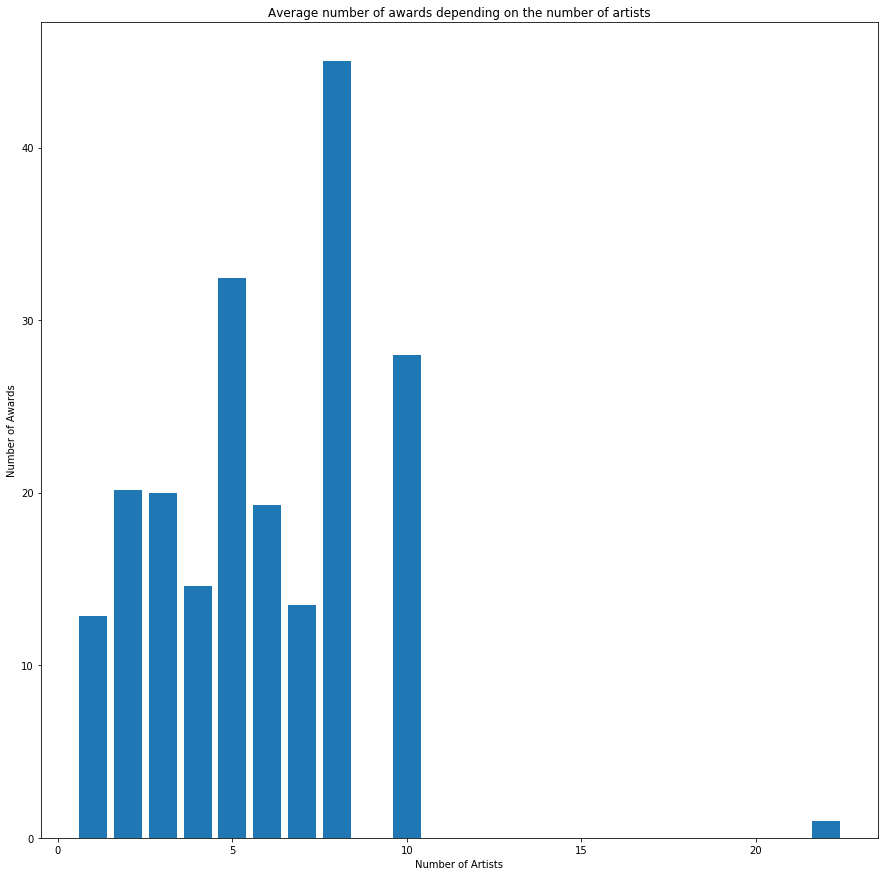

In [32]:
award_num = song_df.groupby("num_artists").mean()["award_num"]
plt.figure(figsize=(15,15))
plt.bar(award_num.index,award_num)
plt.title("Average number of awards depending on the number of artists")
plt.ylabel("Number of Awards")
plt.xlabel("Number of Artists")
plt.show()

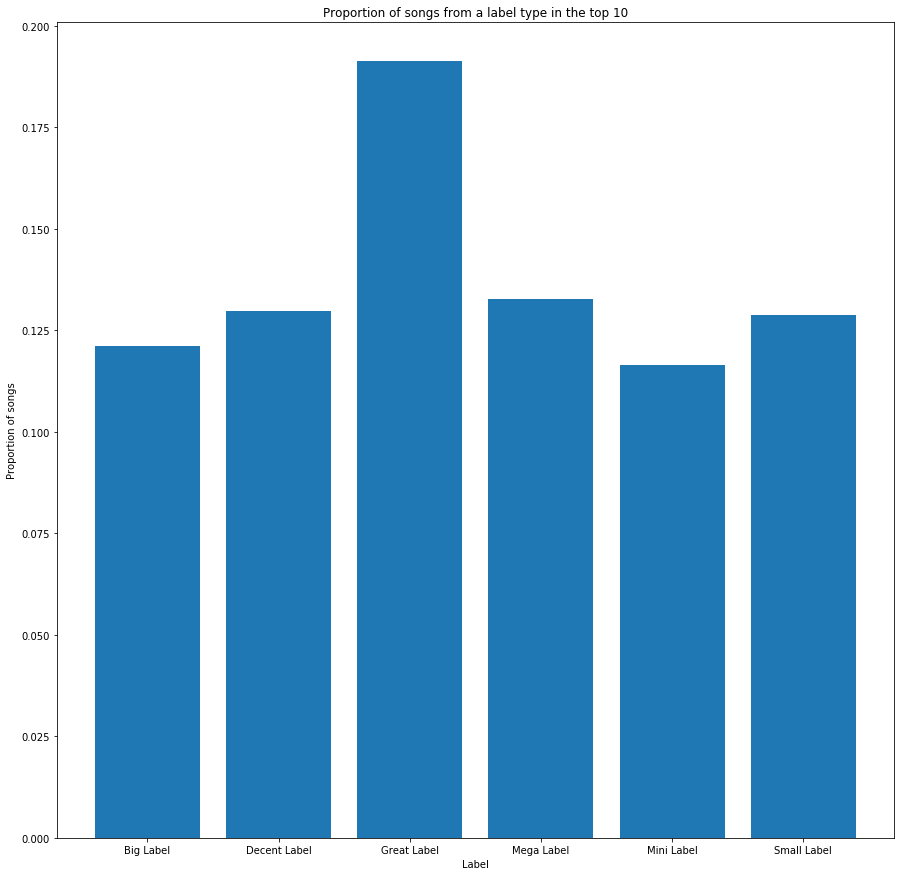

In [46]:
award_num = song_df.groupby("label_category").mean()["top10"]
plt.figure(figsize=(15,15))
plt.bar(award_num.index,award_num)
plt.title("Proportion of songs from a label type in the top 10")
plt.ylabel("Proportion of songs")
plt.xlabel("Label")
plt.show()

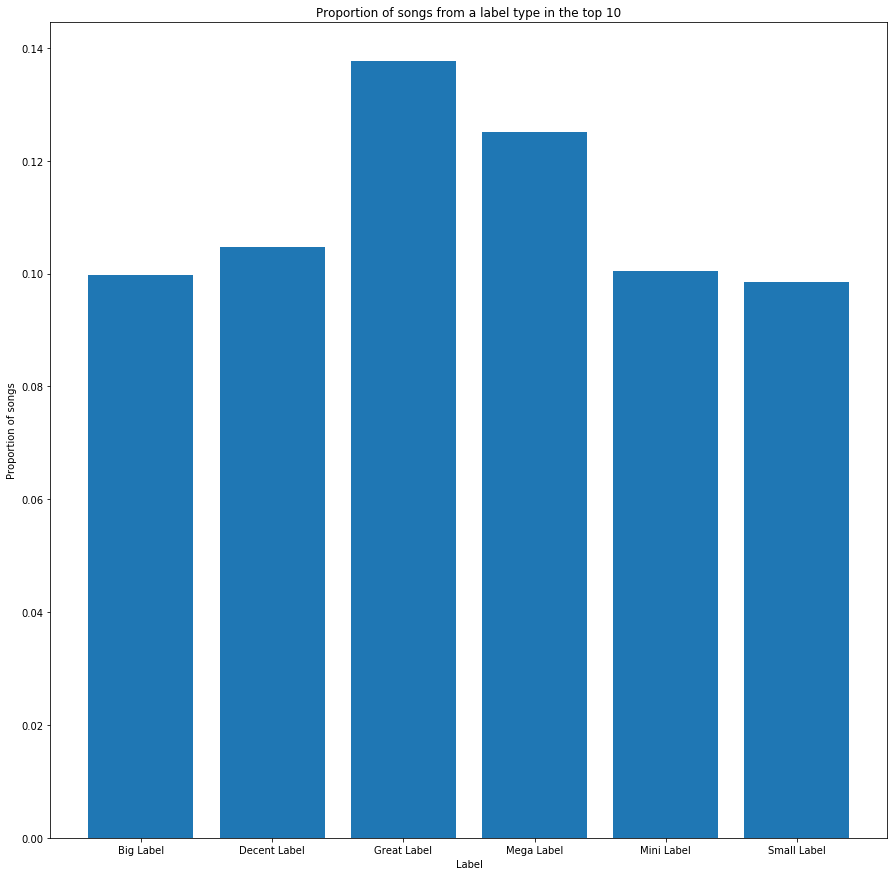

In [126]:
award_num = song_df[song_df["firstrank"]>10].groupby("label_category_group").mean()["top10"]
plt.figure(figsize=(15,15))
plt.bar(award_num.index,award_num)
plt.title("Proportion of songs from a label type in the top 10")
plt.ylabel("Proportion of songs")
plt.xlabel("Label")
plt.savefig("labeltop10")
plt.show()

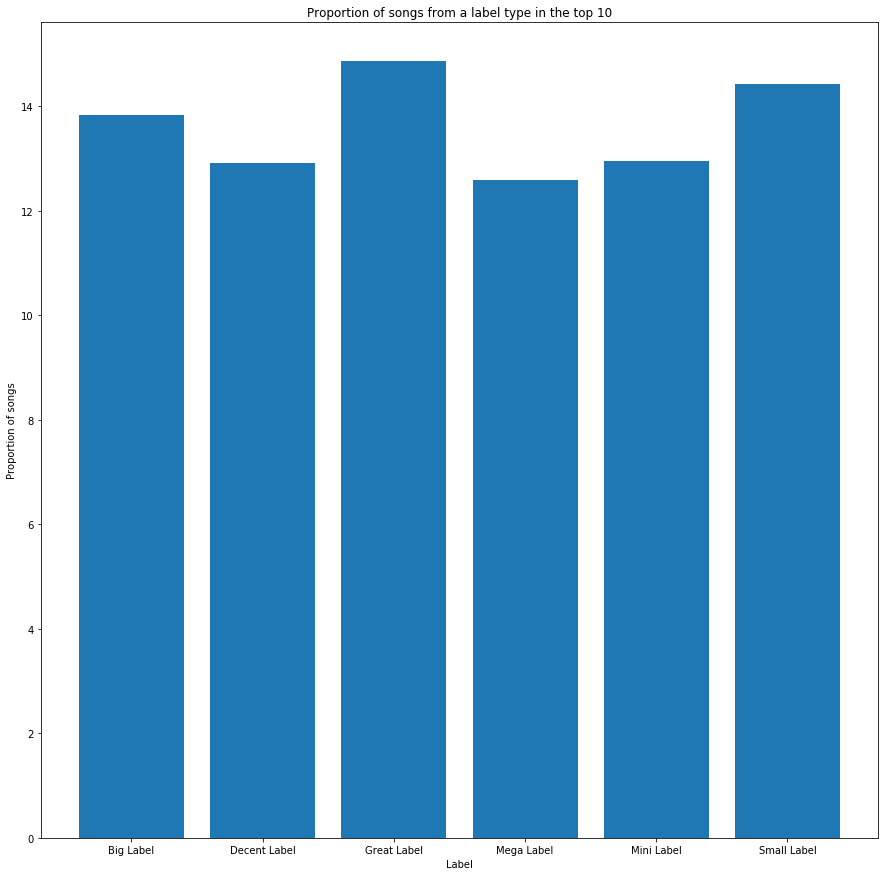

In [53]:
award_num = song_df.groupby("label_category_group").mean()["numberofappearances"]
plt.figure(figsize=(15,15))
plt.bar(award_num.index,award_num)
plt.title("Proportion of songs from a label type in the top 10")
plt.ylabel("Proportion of songs")
plt.xlabel("Label")
plt.show()

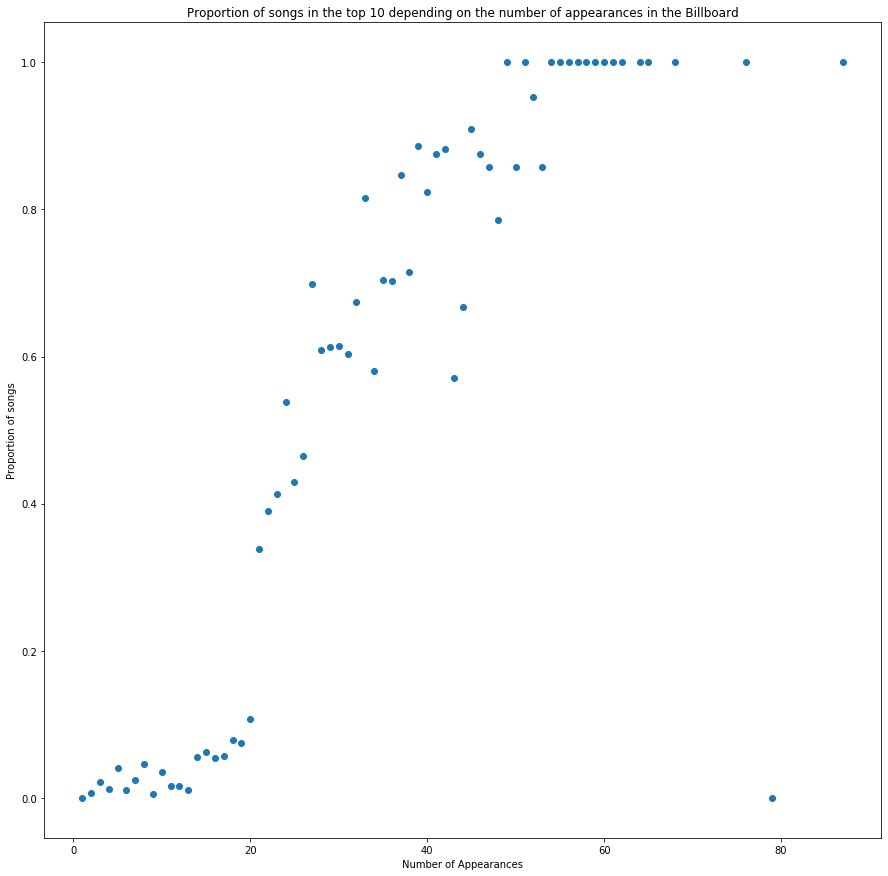

In [56]:
award_num = song_df.groupby("numberofappearances").mean()["top10"]
plt.figure(figsize=(15,15))
plt.scatter(award_num.index,award_num)
plt.title("Proportion of songs in the top 10 depending on the number of appearances in the Billboard")
plt.ylabel("Proportion of songs")
plt.xlabel("Number of Appearances")
plt.show()

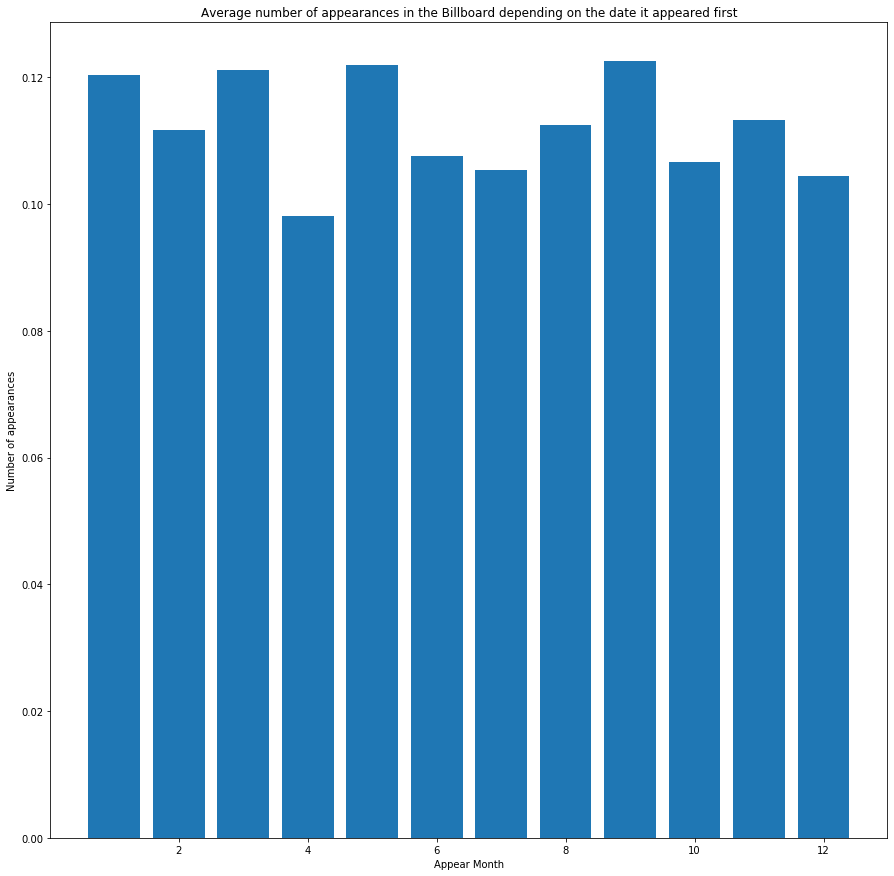

In [132]:
award_num = song_df[song_df["firstrank"]>10].groupby("datetime_month").mean()["top10"]
plt.figure(figsize=(15,15))
plt.bar(award_num.index,award_num)
plt.title("Average number of appearances in the Billboard depending on the date it appeared first")
plt.ylabel("Number of appearances")
plt.xlabel("Appear Month")
plt.savefig("top10bymonth")
plt.show()

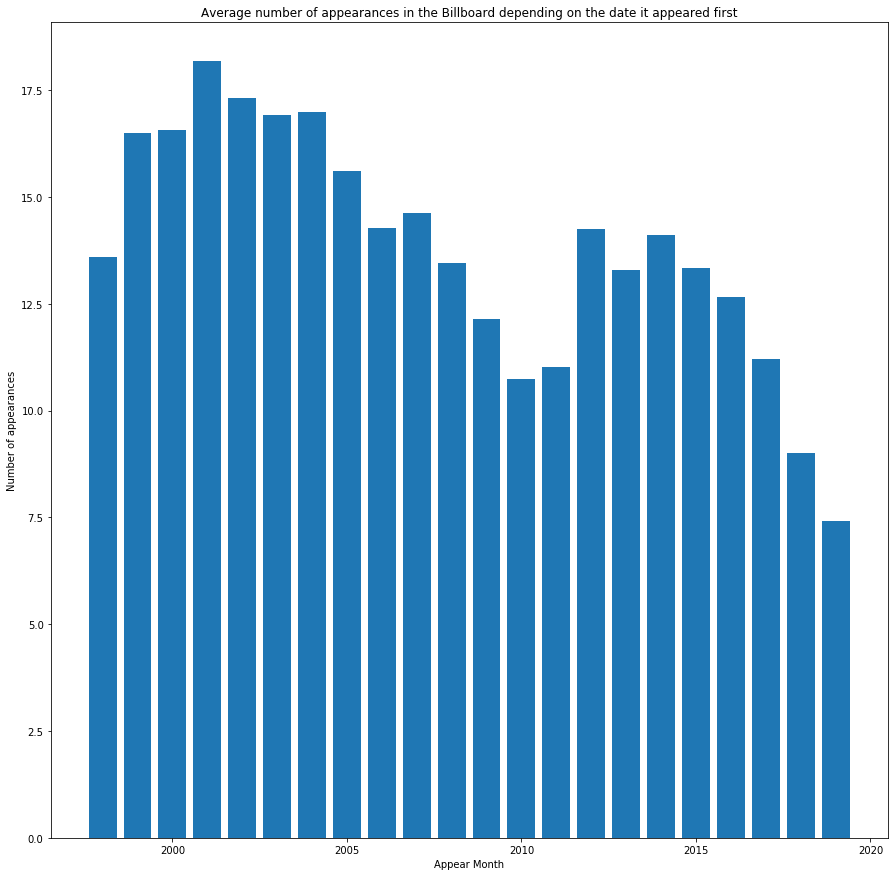

In [95]:
award_num = song_df.groupby("datetime_year").mean()["numberofappearances"]
plt.figure(figsize=(15,15))
plt.bar(award_num.index,award_num)
plt.title("Average number of appearances in the Billboard depending on the date it appeared first")
plt.ylabel("Number of appearances")
plt.xlabel("Appear Month")
plt.show()

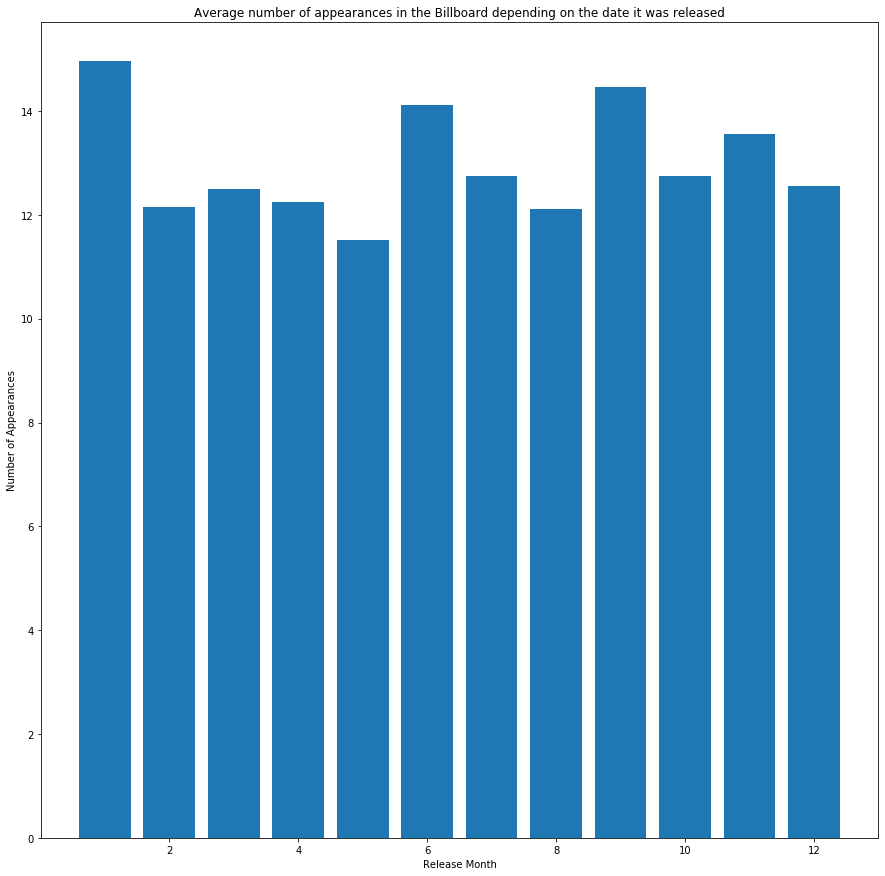

In [85]:
award_num = song_df.groupby("release_month").mean()["numberofappearances"]
plt.figure(figsize=(15,15))
plt.bar(award_num.index,award_num)
plt.title("Average number of appearances in the Billboard depending on the date it was released")
plt.ylabel("Number of Appearances")
plt.xlabel("Release Month")
plt.show()

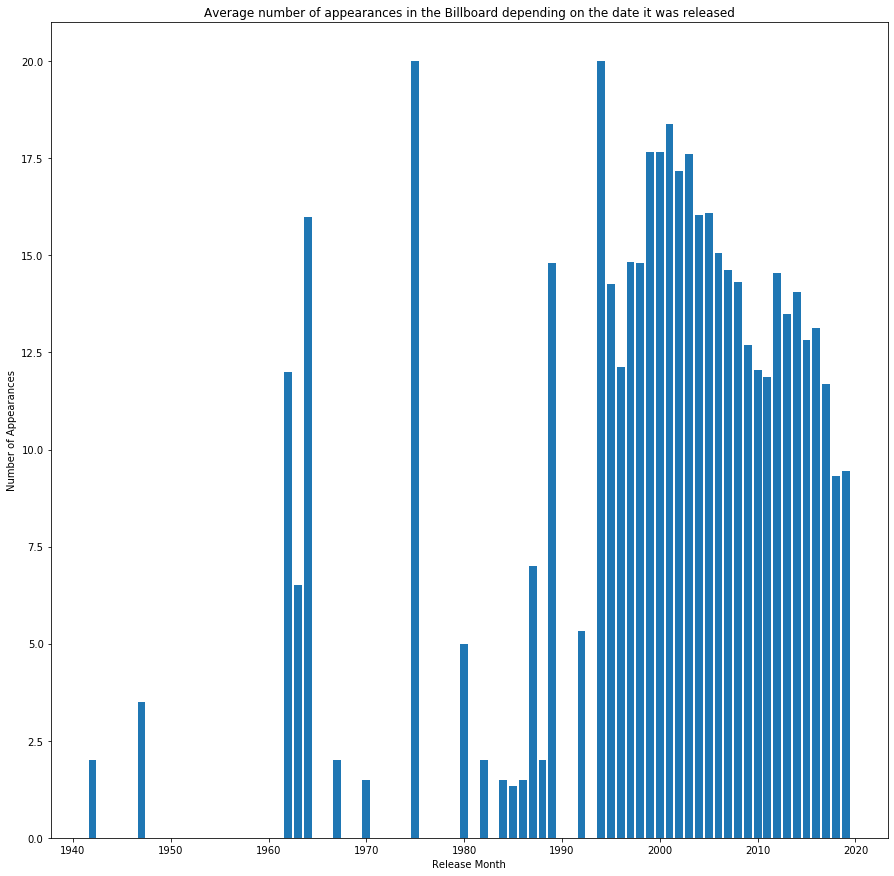

In [93]:
award_num = song_df.groupby("release_year").mean()["numberofappearances"]
plt.figure(figsize=(15,15))
plt.bar(award_num.index,award_num)
plt.title("Average number of appearances in the Billboard depending on the date it was released")
plt.ylabel("Number of Appearances")
plt.xlabel("Release Month")
plt.show()

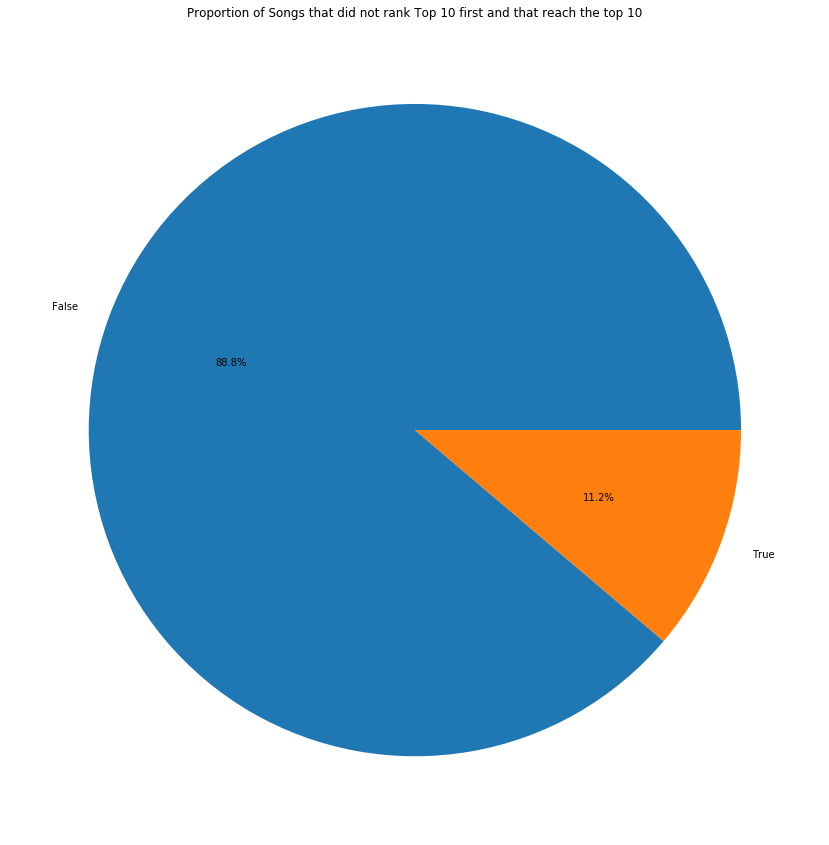

In [127]:
top10proportion = song_df[song_df["firstrank"]>10].groupby("top10").count()["numberofappearances"] / len(song_df[song_df["firstrank"]>10])
plt.figure(figsize=(15,15))
plt.pie(top10proportion,autopct ="%1.1f%%",labels=top10proportion.index)
plt.title("Proportion of Songs that did not rank Top 10 first and that reach the top 10")
plt.savefig("top10notfirstrank")
plt.show()


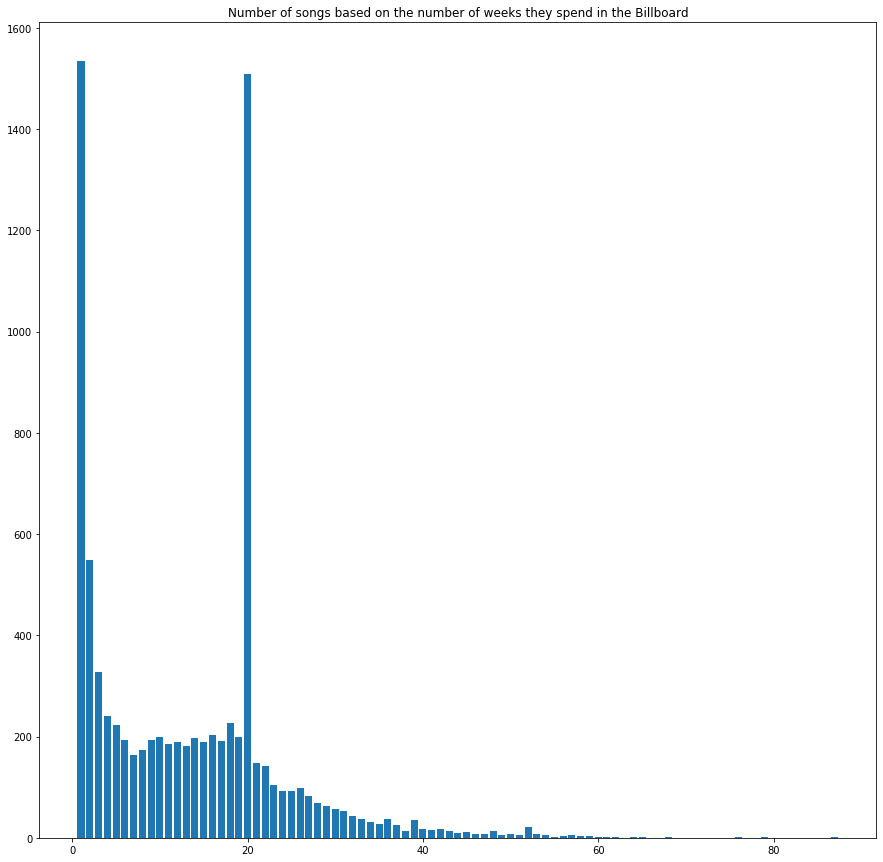

In [120]:
numappearances = song_df.groupby("numberofappearances").count()["artist"]
plt.figure(figsize=(15,15))
plt.bar(numappearances.index,numappearances)
plt.title("Number of songs based on the number of weeks they spend in the Billboard")
plt.show()